In [65]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
from sklearn import linear_model

In [66]:
output = np.loadtxt('output.txt')
output.shape

(95, 54)

In [77]:
T_critical = 2/(np.log(1 + np.sqrt(2)))
T = output[:, 0]
selector = []
selector1 = []
for t in T.tolist():
    if (10 * t).is_integer():
        selector.append(True)
    else:
        selector.append(False)
    if t >= 2.2 and t <= 2.4:
        selector1.append(True)
    else:
        selector1.append(False)
            

Energy = output[:, 1]
Specific_Heat = output[:, 2]
Magnetization = output[:, 3]

Gamma_data = output[:, 4:44]

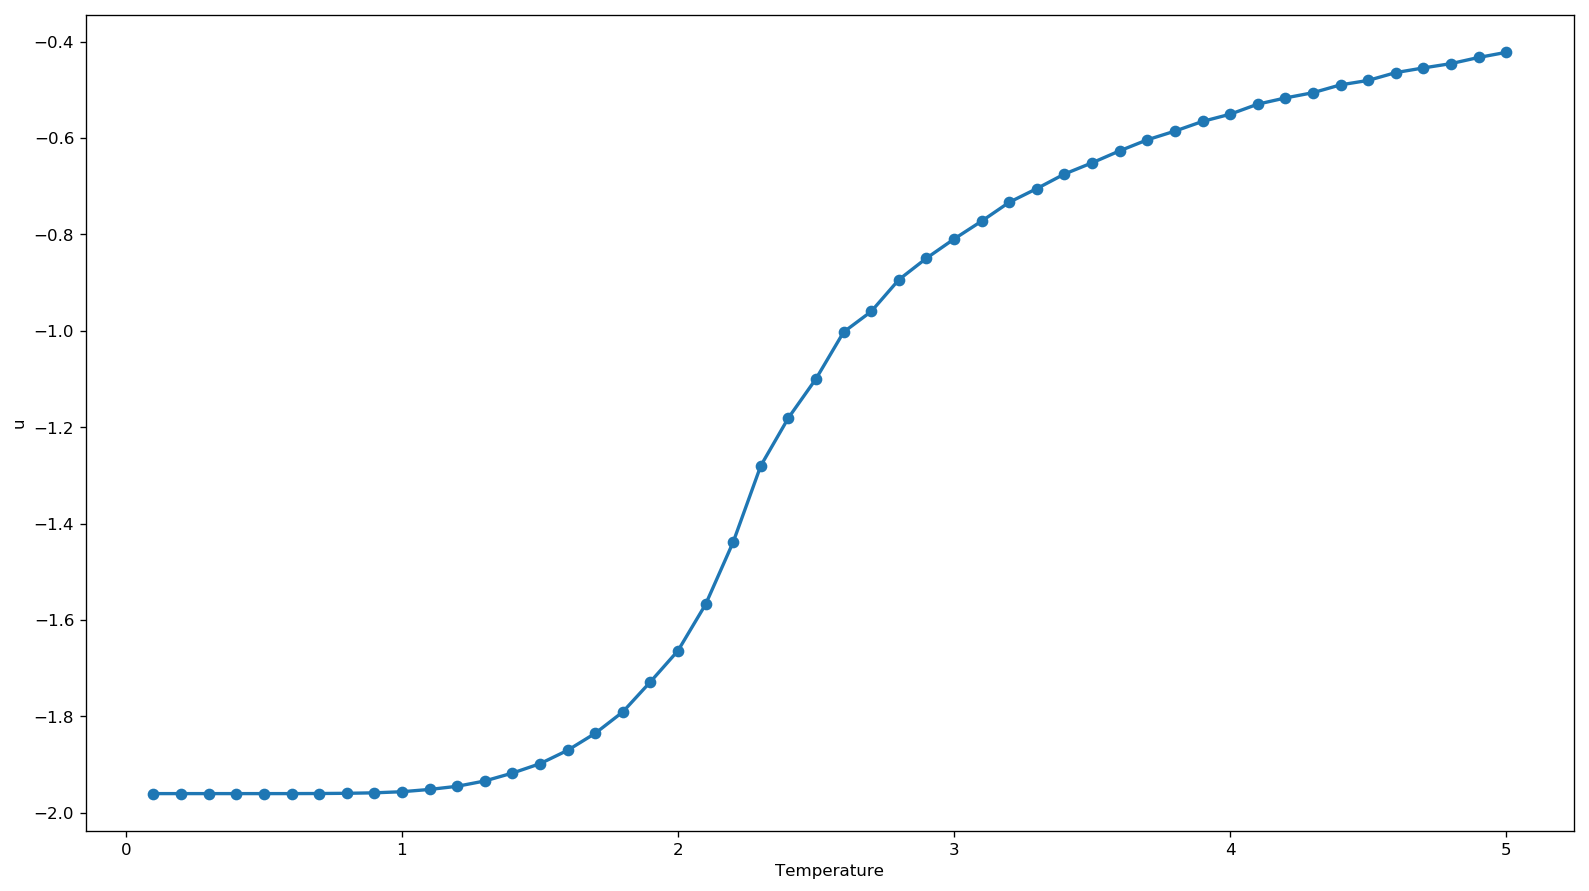

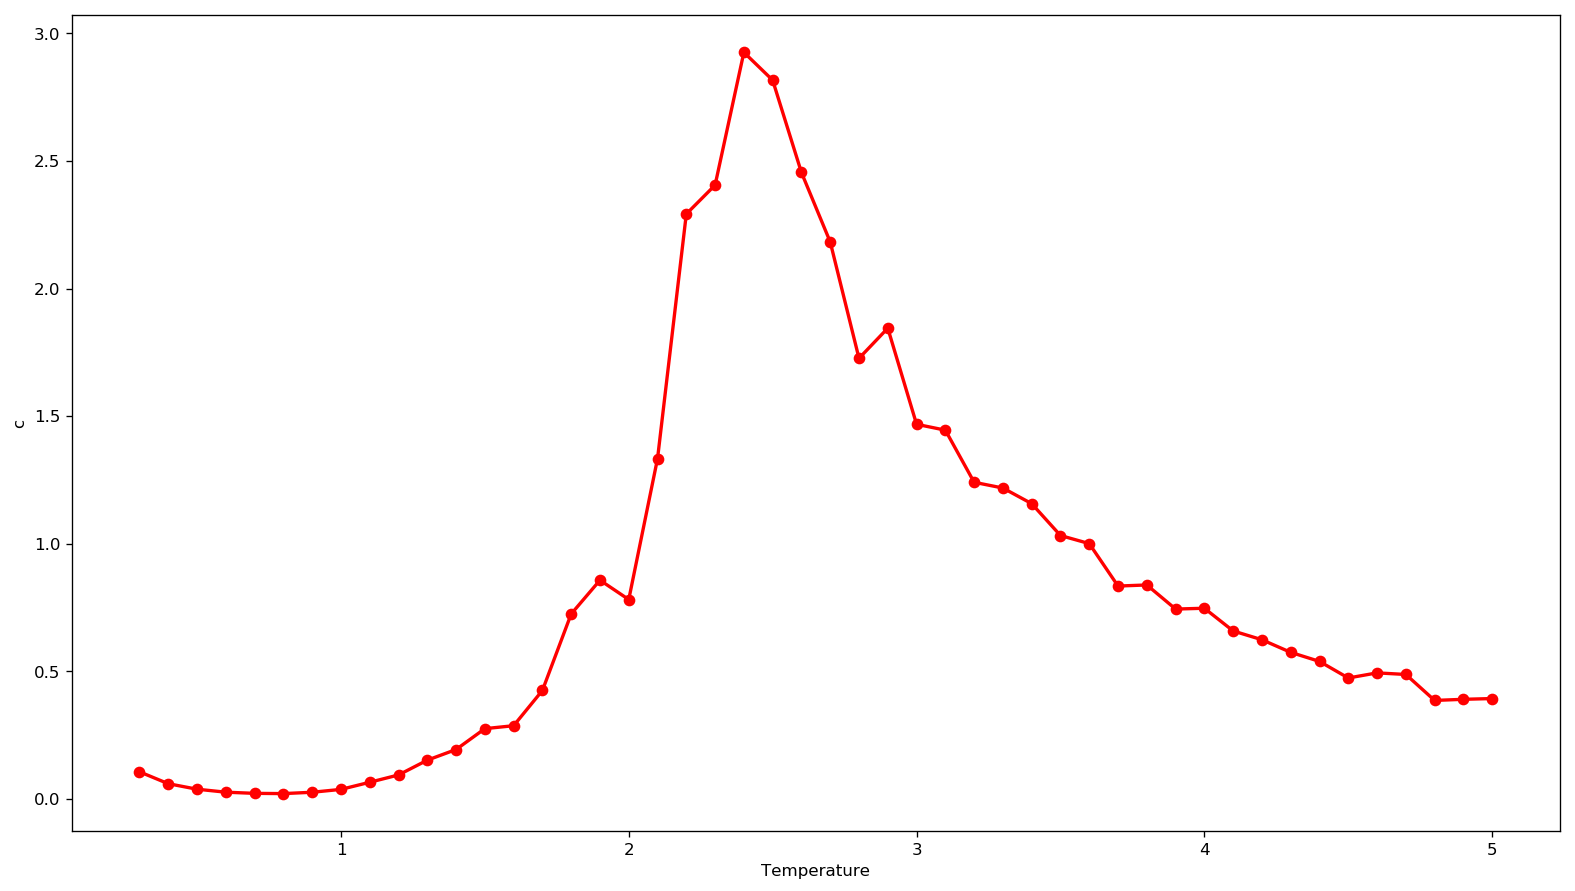

In [118]:
plt.figure(figsize = (16, 9), dpi = 120)
plt.plot(T[selector], Energy[selector], linewidth = 2, marker = 'o', markersize = 6)
plt.ylabel("u")
plt.xlabel("Temperature")
plt.show()

plt.figure(figsize = (16, 9), dpi = 120)
plt.plot((T[selector])[T[selector] >= 0.3], (Specific_Heat[selector])[[T[selector] >= 0.3]], linewidth = 2, marker = 'o', markersize = 6, color = 'red')
plt.ylabel("c")
plt.xlabel("Temperature")
plt.show()




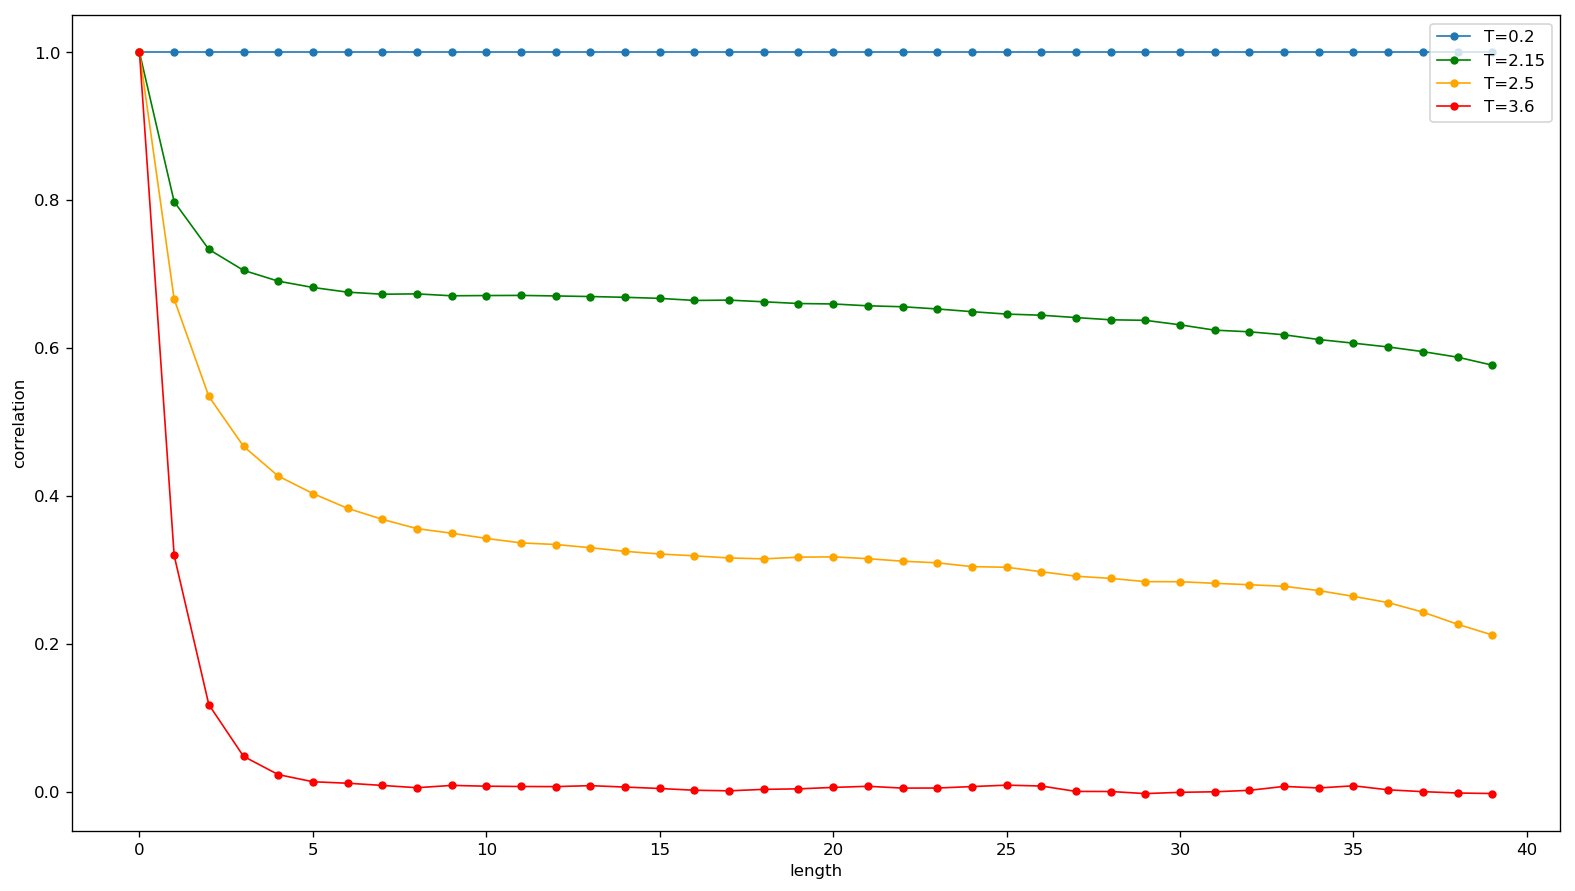

In [115]:
plt.figure(figsize = (16, 9), dpi = 120)
plt.plot(range(0, 40), Gamma_data[1 ,:], linewidth = 1, marker = 'o', markersize = 4, label = "T="+str(T[1]))
plt.plot(range(0, 40), Gamma_data[30 ,:], linewidth = 1, marker = 'o', markersize = 4, color = 'green', label = "T="+str(T[34]))
plt.plot(range(0, 40), Gamma_data[50 ,:], linewidth = 1, marker = 'o', markersize = 4, color = 'orange', label = "T="+str(T[69]))
plt.plot(range(0, 40), Gamma_data[80 ,:], linewidth = 1, marker = 'o', markersize = 4, color = 'red', label = "T="+str(T[80]))
plt.legend(loc = "upper right")
plt.ylabel("correlation")
plt.xlabel("length")
plt.show()

In [70]:
xi = np.ones(95) * 0.5
r = np.arange(0, 40)
ita = 0.01
for i in range(0, 95):
    for j in range(0, 20000):
        xi[i] = xi[i] + min(ita, 1/(j + 1)) * np.sum((Gamma_data[i,:] - np.exp(-r / xi[i]))* np.exp(-r / xi[i]) * r /xi[i])

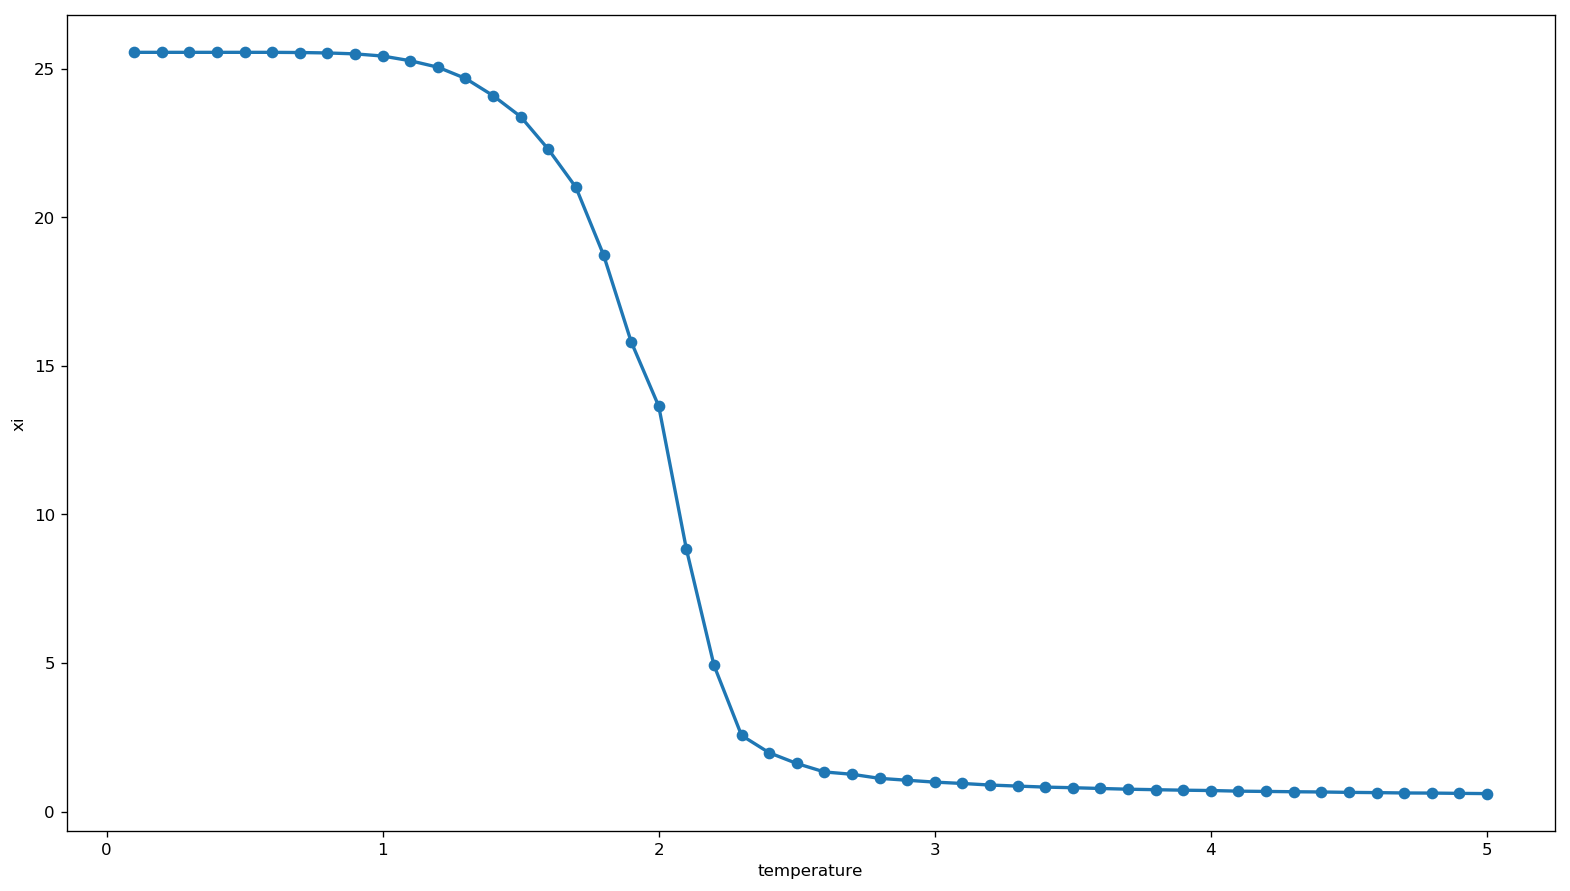

In [132]:
plt.figure(figsize = (16, 9), dpi = 120)
plt.plot(T[selector], xi[selector], linewidth=2, marker = 'o', markersize = 6)
plt.ylabel("xi")
plt.xlabel("temperature")
plt.show()

In [129]:
T1 = T[selector1]
eps = np.abs(T1/T_critical - 1)
xi1 = xi[selector1]
Mag1 = Magnetization[selector1]
SH1 = Specific_Heat[selector1]

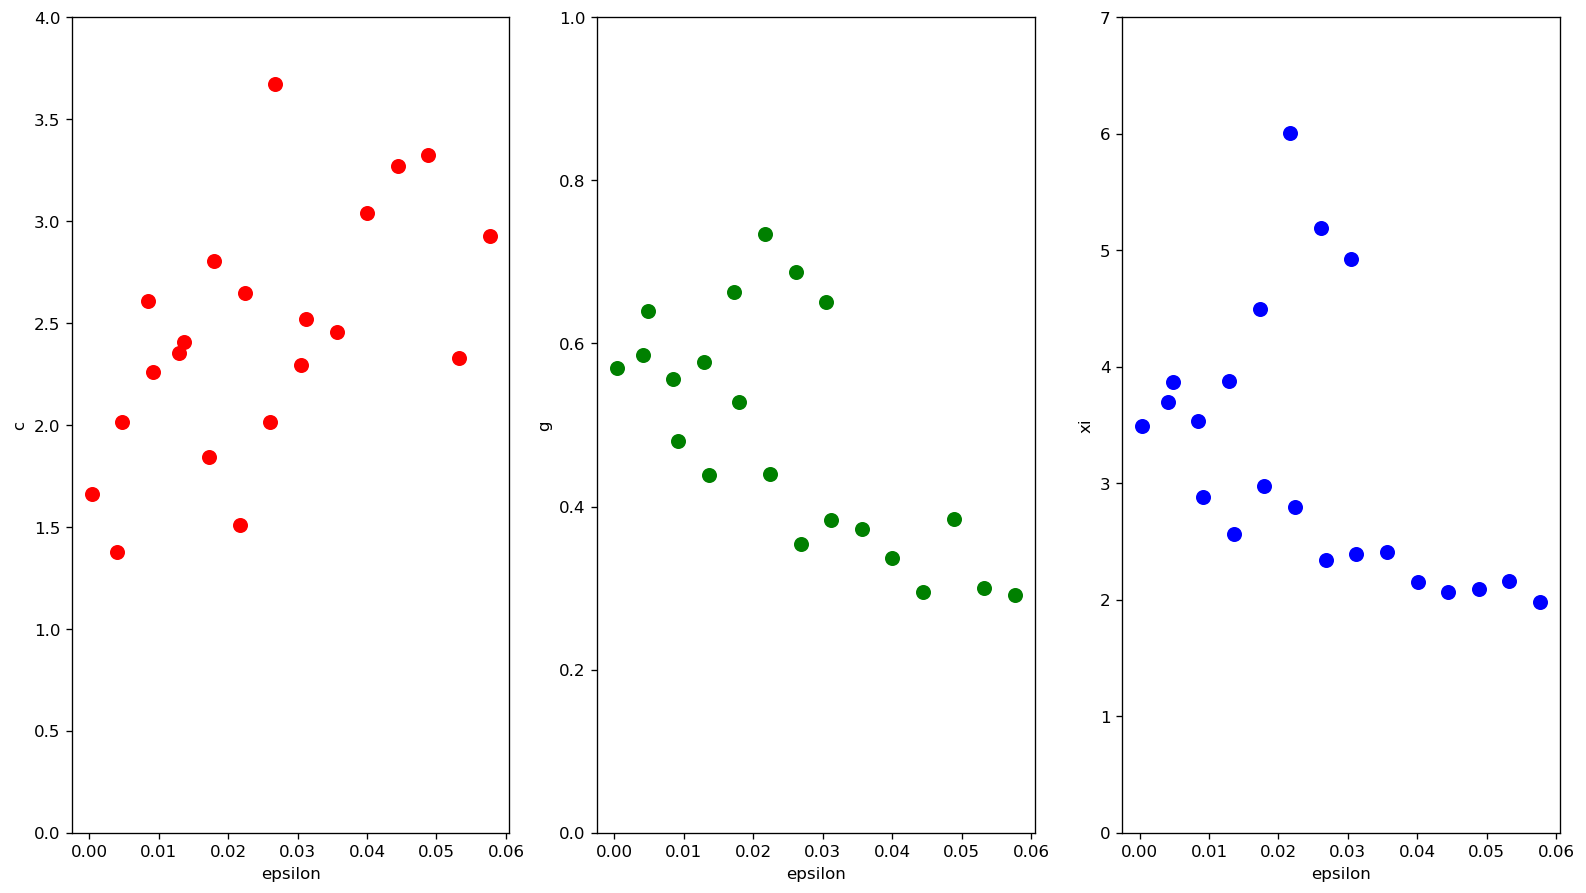

In [140]:
plt.figure(figsize = (16, 9), dpi = 120)
pic1 = plt.subplot(1, 3, 1)
pic1.plot(eps, SH1, linewidth = 0, marker = 'o', markersize = 8, color = 'red')
pic1.set_ylim(0, 4)
pic1.set_ylabel("c")
pic1.set_xlabel("epsilon")

pic2 = plt.subplot(1, 3, 2)
pic2.plot(eps, Mag1, linewidth = 0, marker = 'o', markersize = 8, color = 'green')
pic2.set_ylim(0, 1)
pic2.set_ylabel("g")
pic2.set_xlabel("epsilon")

pic3 = plt.subplot(1, 3, 3)
pic3.plot(eps, xi1, linewidth = 0, marker = 'o', markersize = 8, color = 'blue')
pic3.set_ylim(0, 7)
pic3.set_ylabel("xi")
pic3.set_xlabel("epsilon")
plt.show()

In [101]:
output1 = np.loadtxt('output1.txt')
output1 = output1[:, range(1, 61, 2)] 
output1.shape

(6, 30)

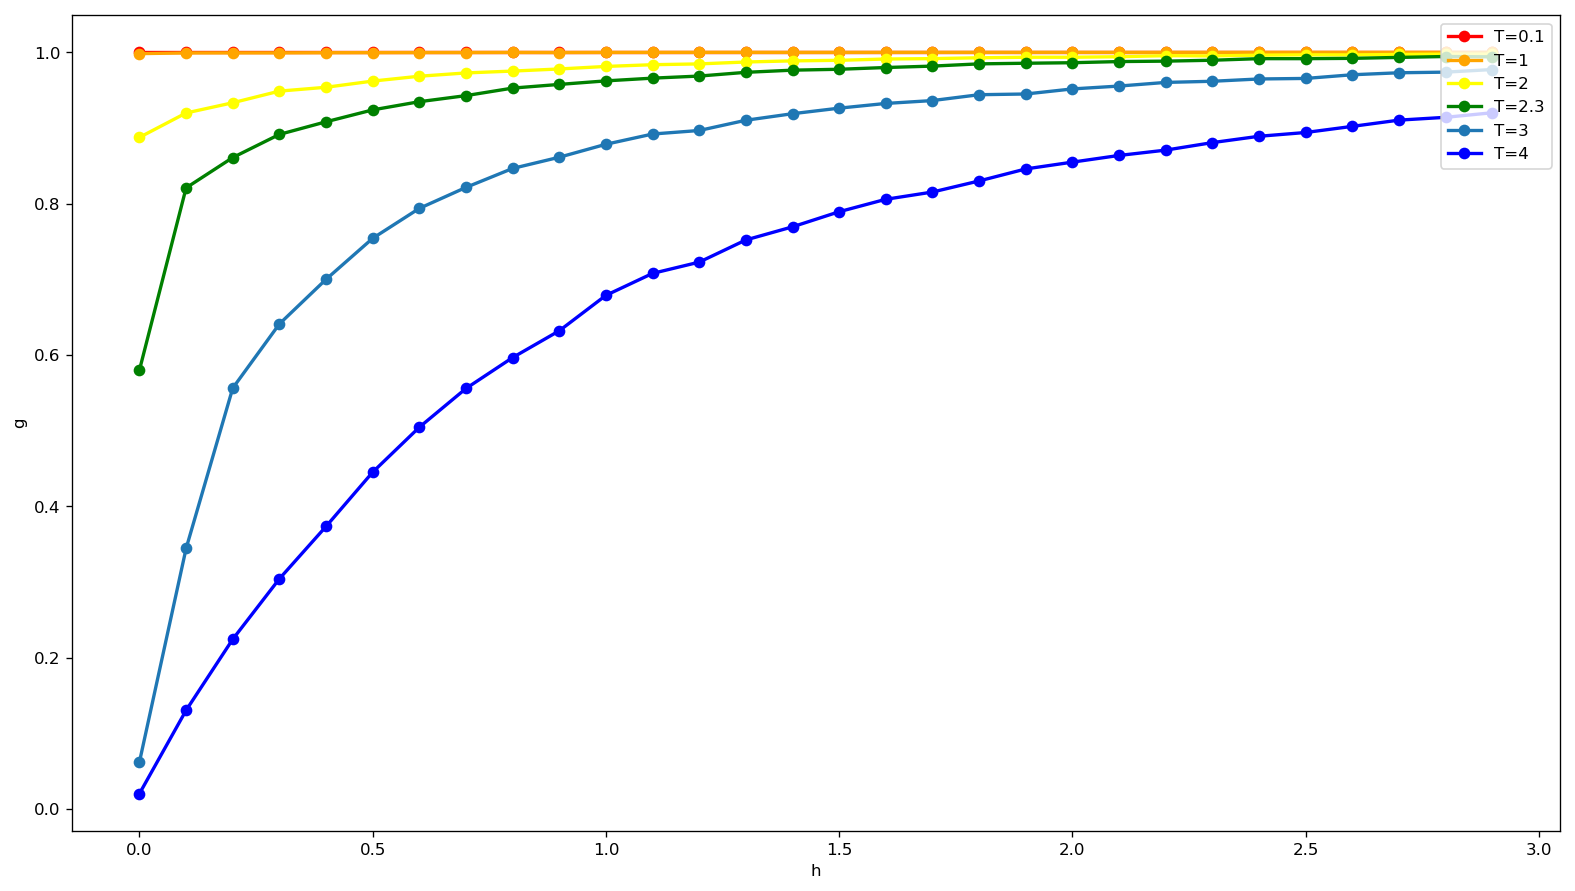

In [102]:
plt.figure(figsize = (16, 9), dpi = 120)
plt.plot(np.arange(0, 3, 0.1), output1[0, :], linewidth = 2, marker = 'o', markersize = 6, color = 'red', label = "T=0.1")
plt.plot(np.arange(0, 3, 0.1), output1[1, :], linewidth = 2, marker = 'o', markersize = 6, color = 'orange', label = "T=1")
plt.plot(np.arange(0, 3, 0.1), output1[2, :], linewidth = 2, marker = 'o', markersize = 6, color = 'yellow', label = "T=2")
plt.plot(np.arange(0, 3, 0.1), output1[3, :], linewidth = 2, marker = 'o', markersize = 6, color = 'green', label = "T=2.3")
plt.plot(np.arange(0, 3, 0.1), output1[4, :], linewidth = 2, marker = 'o', markersize = 6, label = "T=3")
plt.plot(np.arange(0, 3, 0.1), output1[5, :], linewidth = 2, marker = 'o', markersize = 6, color = 'blue', label = "T=4")
plt.legend(loc = "upper right")
plt.ylabel("g")
plt.xlabel("h")
plt.show()

In [103]:
output2 = np.loadtxt('output2.txt')
output2.shape

(300, 50)

Text(0.5,1,'T = 4')

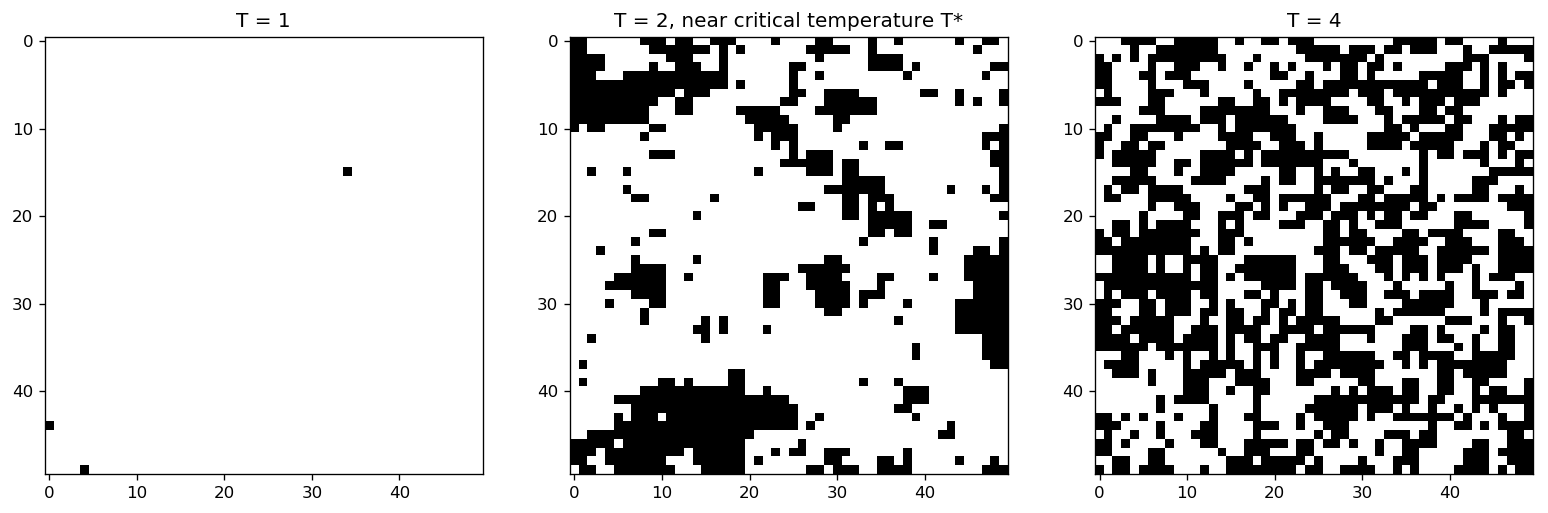

In [114]:
config_1 = output2[50:100, :]
config_2 = output2[150:200, :]
config_4 = output2[250:300, :]

plt.figure(figsize = (16, 9), dpi = 120)
ax1 = plt.subplot(1,3,1)
ax1.imshow(config_1, cmap='gray')
ax1.set_title("T = 1")
ax2 = plt.subplot(1,3,2)
ax2.imshow(config_2, cmap='gray')
ax2.set_title("T = 2, near critical temperature T*")
ax3 = plt.subplot(1,3,3)
ax3.imshow(config_4, cmap='gray')
ax3.set_title("T = 4")